In [2]:
from pathlib import Path
import hydra
from omegaconf import OmegaConf
from hydra.utils import instantiate

config_path = "config"
config_name = "train"
ckpt = "experiments/basic_cnn/runs/2024-05-19-15-58-30/checkpoints/last.ckpt"
ckpt = Path(ckpt)
overrides = OmegaConf.load(ckpt.parent.parent / ".hydra/overrides.yaml")

with hydra.initialize(config_path=config_path, version_base="1.3"):
    config = hydra.compose(config_name=config_name, overrides=overrides)
    config.batch_size = 1
    tokenizer = instantiate(config.tokenizer)
    dm = instantiate(config.datamodule)
    dm.setup()

In [3]:
from tqdm.notebook import tqdm


dm.train_dataset.tokenizer.max_tokens = 2**16
dm.train_dataset.tokenizer.pad = False
dm.train_dataset.tokenizer.max_tokens

65536

In [4]:
from tqdm import tqdm
lens = []
for i in tqdm(range(len(dm.train_dataset))):
    lens.append(len(dm.train_dataset[i][0]))

100%|██████████| 769144/769144 [27:30<00:00, 465.88it/s]  


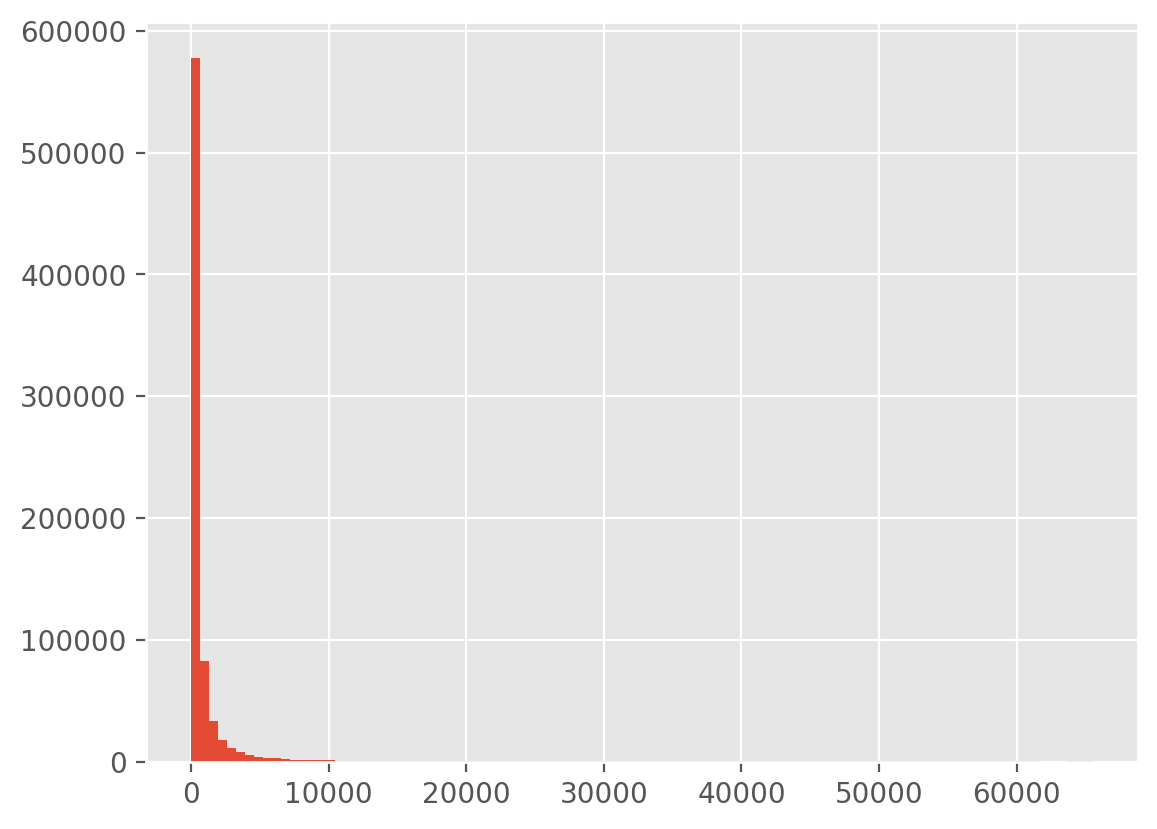

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(dpi=200)
plt.hist(lens, bins=100)
plt.ylabel("Counts")
plt.xlabel("Token sequence length")
plt.show()

In [1]:
with open("lens.txt", "w") as f:
    f.write("\n".join(map(str, lens)))

NameError: name 'lens' is not defined

In [17]:
import numpy as np

np.mean([len(x) for x in lens])

1228.8403516042142

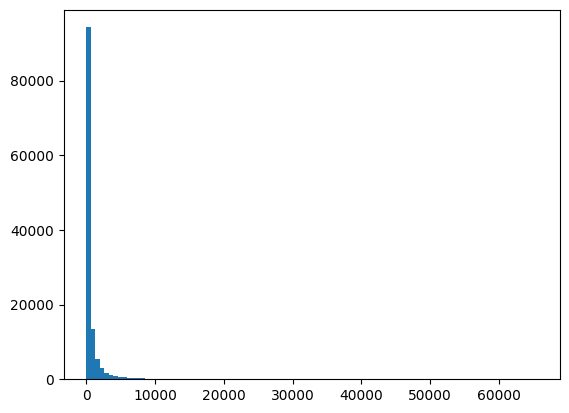

In [16]:
import matplotlib.pyplot as plt

plt.hist([len(x) for x in lens], bins=100);